In [1]:
import pandas as pd

train = pd.read_csv("C:/Users/JDDS/OneDrive/문서/github/AI_study/04_ML/titanic_data/train.csv")
test = pd.read_csv("C:/Users/JDDS/OneDrive/문서/github/AI_study/04_ML/titanic_data/test.csv")
sub = pd.read_csv("C:/Users/JDDS/OneDrive/문서/github/AI_study/04_ML/titanic_data/gender_submission.csv")

In [2]:
print(train.shape)
print(test.shape)
print(sub.shape)

(891, 12)
(418, 11)
(418, 2)


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### EDA - 시각화

<AxesSubplot:xlabel='Survived', ylabel='count'>

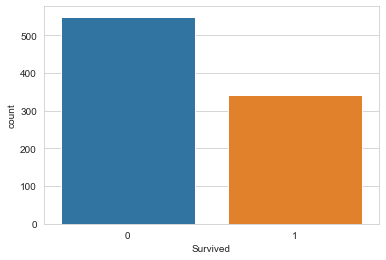

In [14]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')   # seaborn 스타일 지정
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

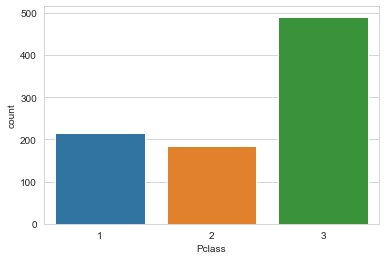

In [8]:
## 해보기 : PClass 별 Count
sns.countplot(x='Pclass', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

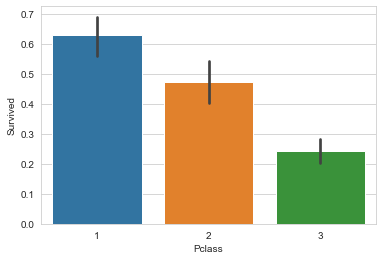

In [9]:
sns.set_style('whitegrid')   # seaborn 스타일 지정
sns.barplot(x='Pclass', y='Survived', data=train)

(0.0, 96.85957367917433)

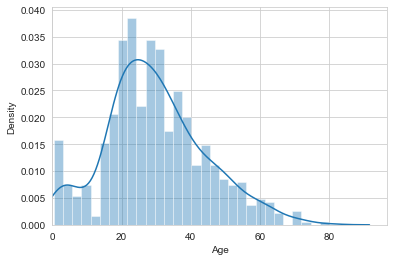

In [15]:
sns.distplot(train['Age'].dropna(), bins=30).set_xlim(0,)

(0.0, 593.1479879851557)

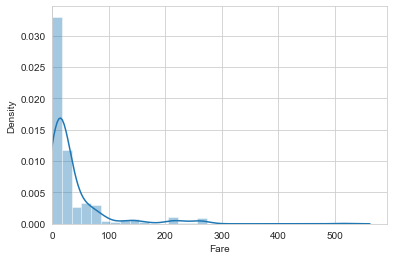

In [16]:
## 해보기 Fare
sns.distplot(test['Fare'].dropna(), bins=30).set_xlim(0,)

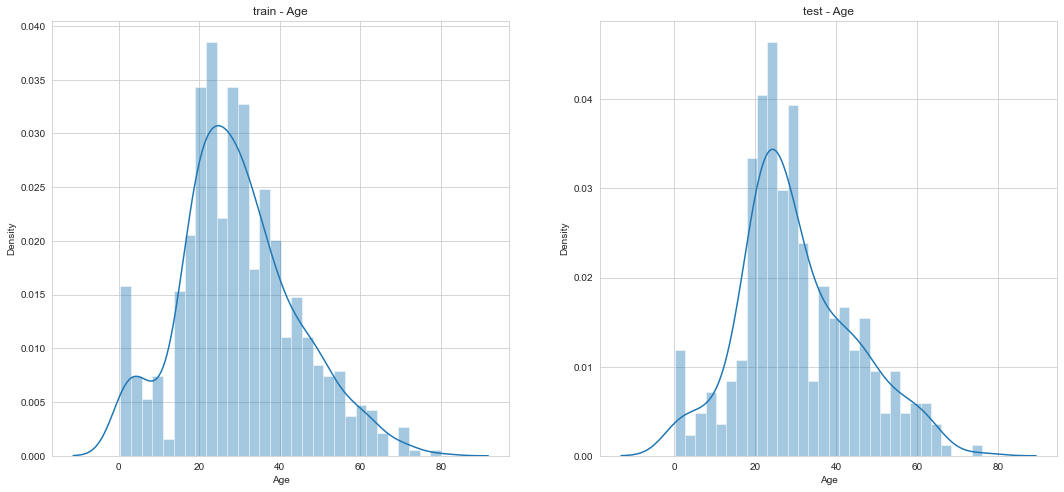

In [17]:
import matplotlib.pyplot as plt

f,ax=plt.subplots(1,2,figsize=(18,8))

# 첫번째 그래프
sns.distplot(train['Age'].dropna(), bins=30, ax=ax[0])
ax[0].set_title('train - Age')

# 두번째 그래프 
sns.distplot(test['Age'].dropna(), bins=30, ax=ax[1])
ax[1].set_title('test - Age')
plt.show()

### 결측치 처리
- 나이는 평균값
- 결측치 채우기 [].fillna(값)

In [18]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

## 해보기 
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())

print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### 결측치 처리 - Embarked(승선항)
- 가장 많이 나온 값으로 결측치 처리를 하자

In [19]:
val_mode = train['Embarked'].mode()
print(val_mode[0])
train['Embarked'] = train['Embarked'].fillna(val_mode[0])

S


In [20]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


### 라벨 인코딩 및 자료형 변환

In [21]:
train['Sex'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Sex'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked']= test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [22]:
## 나이에 대한 int 처리
train['Age'] = train['Age'].astype('int')
test['Age'] = test['Age'].astype('int')

### 데이터나누기

In [24]:
sel = ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked']

all_X = train[sel]
all_y = train['Survived']

last_X_test = test[sel]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_X, 
                                                    all_y,    
                                                    stratify=all_y,
                                                    test_size=0.3,
                                                    random_state=77 )

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model = [DecisionTreeClassifier(), LogisticRegression(), LinearSVC(), KNeighborsClassifier()]

for model_one in model:
    model = model_one
    model.fit(X_train, y_train)
    acc_tr = model.score(X_train, y_train)
    acc_test = model.score(X_test, y_test)
    print("모델명 : {}, 정확도 {} {} ".format(model, acc_tr, acc_test) )

모델명 : DecisionTreeClassifier(), 정확도 1.0 0.753731343283582 
모델명 : LogisticRegression(), 정확도 0.7817014446227929 0.8059701492537313 
모델명 : LinearSVC(), 정확도 0.6918138041733547 0.7276119402985075 
모델명 : KNeighborsClassifier(), 정확도 0.7335473515248796 0.6268656716417911 


### Logistic모델을 이용하여 제출하기

In [28]:
model = LogisticRegression()
model.fit(all_X, all_y)
pred = model.predict(last_X_test)
sub['Survived'] = pred
sub.to_csv("four_lgreg_sub.csv", index=False) 

In [29]:
import os
files = os.listdir()
print("파일 유무 확인 : ", "four_lgreg_sub.csv" in files)

파일 유무 확인 :  True
